In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Parameters
m, n = 3, 3  # lattice size

# Basis vectors
a = 1
a1 = np.array([a, 0])
a2 = np.array([a/2, np.sqrt(3)/2 * a])


In [ ]:
positions = {}
G = nx.Graph()

for i in range(m):
    for j in range(n):
        node = (i, j)
        pos = i * a1 + j * a2
        positions[node] = (pos[0], pos[1])
        G.add_node(node)

# Add edges for triangular lattice connectivity (3 directions)
for i in range(m):
    for j in range(n):
        node = (i, j)
        # Right neighbor
        if i + 1 < m:
            G.add_edge(node, (i+1, j))
        # Up-right neighbor
        if i + 1 < m and j + 1 < n:
            G.add_edge(node, (i+1, j+1))
        # Up neighbor
        if j + 1 < n:
            G.add_edge(node, (i, j+1))

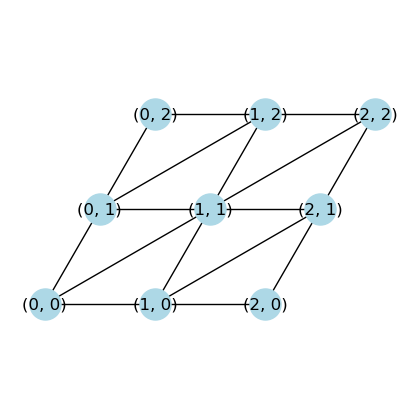

In [6]:
# Plot
plt.figure(figsize=(4,4))
nx.draw(G, positions, with_labels=True, node_color='lightblue', node_size=500)
plt.axis('equal')
plt.show()